In [11]:
import json
import altair as alt
import pandas as pd
import numpy as np
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [12]:
data_files = {
    'No nulls': 'results_0.json',
    '10% nulls': 'results_10.json',
    '50% nulls': 'results_50.json'
}

all_results = []

for case, filename in data_files.items():
    case_results = json.loads(open(filename).read())['benchmarks']
    for result in case_results:
        result['case'] = case
        all_results.append(result)

results = pd.DataFrame.from_records(all_results)

In [13]:
results

,case,cpu_time,iterations,name,real_time,time_unit
0,No nulls,11902.910082,61,BM_SumDoubleNoNulls,11902.635198,us
1,No nulls,5253.817891,138,BM_SumInt64NoNulls,5253.659246,us
2,No nulls,4947.506535,142,BM_SumDoubleNoNullsBatched,4947.322873,us
3,No nulls,5077.075640,100,BM_SumInt64NoNullsBatched,5076.935000,us
4,No nulls,11842.401377,61,BM_SumDoubleSentinel,11842.203147,us
5,No nulls,7077.296516,95,BM_SumInt64Sentinel,7077.038737,us
6,No nulls,11839.549738,61,BM_SumDoubleSentinelVectorize,11839.173853,us
7,No nulls,7087.000883,94,BM_SumInt64SentinelVectorize,7086.778754,us
8,No nulls,11864.371644,59,BM_SumDoubleBitmapNaive,11864.408626,us
9,No nulls,12054.926517,60,BM_SumInt64BitmapNaive,12054.612400,us


In [14]:
results.name.str.contains('Double')

0      True
1     False
2      True
3     False
4      True
5     False
6      True
7     False
8      True
9     False
10     True
11    False
12     True
13    False
14     True
15    False
16     True
17    False
18     True
19    False
20     True
21    False
22     True
23    False
24     True
25    False
26     True
27    False
28     True
29    False
30     True
31    False
32     True
33    False
34     True
35    False
36     True
37    False
38     True
39    False
40     True
41    False
Name: name, dtype: bool

In [15]:
chart.save?

In [6]:
to_plot

NameError: name 'to_plot' is not defined

In [16]:
to_plot = results.copy()

to_plot['type'] = np.where(to_plot.name.str.contains('Double'), 'double', 'int64')

to_plot.name = to_plot.name.map(
  {'BM_SumDoubleBitmapNaive': 'Naive bitmap',
   'BM_SumDoubleNoNulls': 'Naive no nulls',
   'BM_SumDoubleSentinel': 'Naive Sentinel',
   'BM_SumDoubleBitmapVectorize': 'Vectorized bitmap',
   'BM_SumDoubleNoNullsBatched': 'Vectorized no nulls',
   'BM_SumDoubleSentinelVectorize': 'Vectorized Sentinel',
   'BM_SumInt64BitmapNaive': 'Naive bitmap',
   'BM_SumInt64NoNulls': 'Naive no nulls',
   'BM_SumInt64Sentinel': 'Naive Sentinel',
   'BM_SumInt64BitmapVectorize': 'Vectorized bitmap',
   'BM_SumInt64NoNullsBatched': 'Vectorized no nulls',
   'BM_SumInt64SentinelVectorize': 'Vectorized Sentinel'
   }
)

to_plot.case = pd.Categorical(to_plot.case, 
                              categories=['No nulls', '10% nulls', '50% nulls'])
to_plot = to_plot[to_plot.name.notnull()]


In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


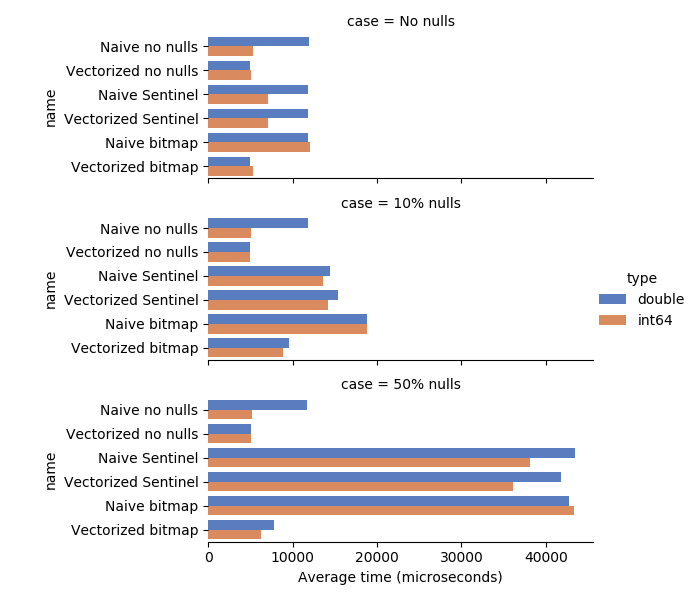

In [41]:
import seaborn as sns

g = sns.catplot(y="name", x="cpu_time", hue="type", data=to_plot,
                kind="bar", palette="muted",
                row='case', aspect=3,
                height=2)
g.despine(left=True)
# g.set_ylabels("survival probability")

g.set_xlabels('Average time (microseconds)')

import matplotlib.pyplot as plt
plt.savefig('bitmaps_vs_sentinels.png')

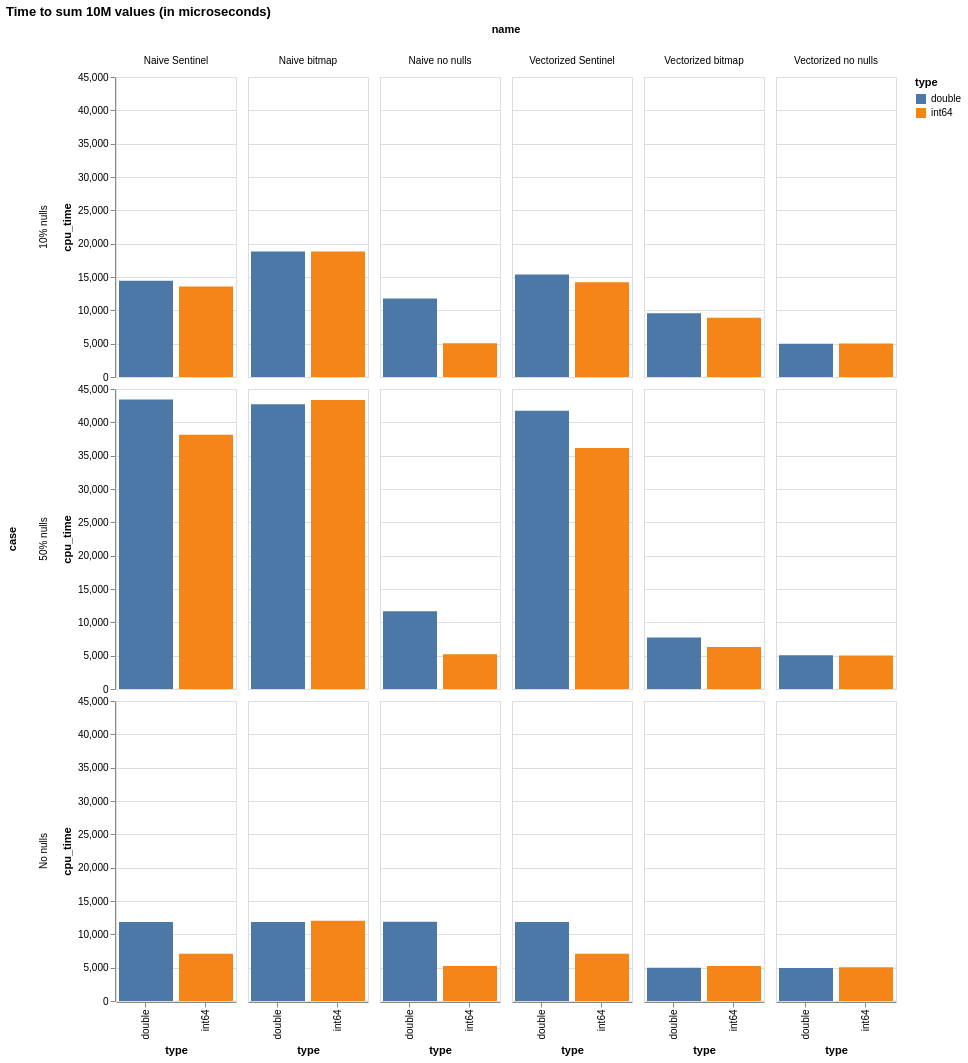

In [17]:

pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])

chart = alt.Chart(to_plot).mark_bar().encode(
  y='cpu_time',
  x='type:N',
  column='name',
  color='type:N',
  row='case'
)

chart.width = 120
chart.height = 300
chart
chart.title = 'Time to sum 10M values (in microseconds)'
# chart.save('results.png', scale_factor=2)
chart

In [40]:
pd.Categorical?